<a href="https://colab.research.google.com/github/metaundefined/Garbage_classification/blob/main/Final_rev_Projek%2CKlasifikasi_Sampah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mengekstrak Data Set
# 1. Upload file DataSet.zip ke direktori

from zipfile import ZipFile

file_name = "/content/Dataset3.zip"

with ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

print('Done')

Done


Jumlah Data Training: 2021
Jumlah Data Testing : 506
Epoch 1/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.2777 - loss: 1.6658 - val_accuracy: 0.4644 - val_loss: 1.4106
Epoch 2/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4743 - loss: 1.3077 - val_accuracy: 0.4881 - val_loss: 1.3486
Epoch 3/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5544 - loss: 1.1292 - val_accuracy: 0.5217 - val_loss: 1.2063
Epoch 4/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6343 - loss: 0.9565 - val_accuracy: 0.6364 - val_loss: 1.0102
Epoch 5/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7340 - loss: 0.7363 - val_accuracy: 0.5158 - val_loss: 1.1989
Epoch 6/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7266 - loss: 0.7261 - val_accuracy: 0.6107 - val_loss: 1.1128
Epoch 7/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7624 - loss: 0.6366 - val_accuracy: 0.6423 - val_loss: 1.0293
Epoch 8/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accur

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9992 - loss: 0.0016
Akurasi Data Training: 99.90%
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6287 - loss: 3.1866
Akurasi Data Testing: 62.85%


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │     3,276,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,920,996 (37.85 MB)

 Trainable params: 3,306,998 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,613,998 (25.23 MB)

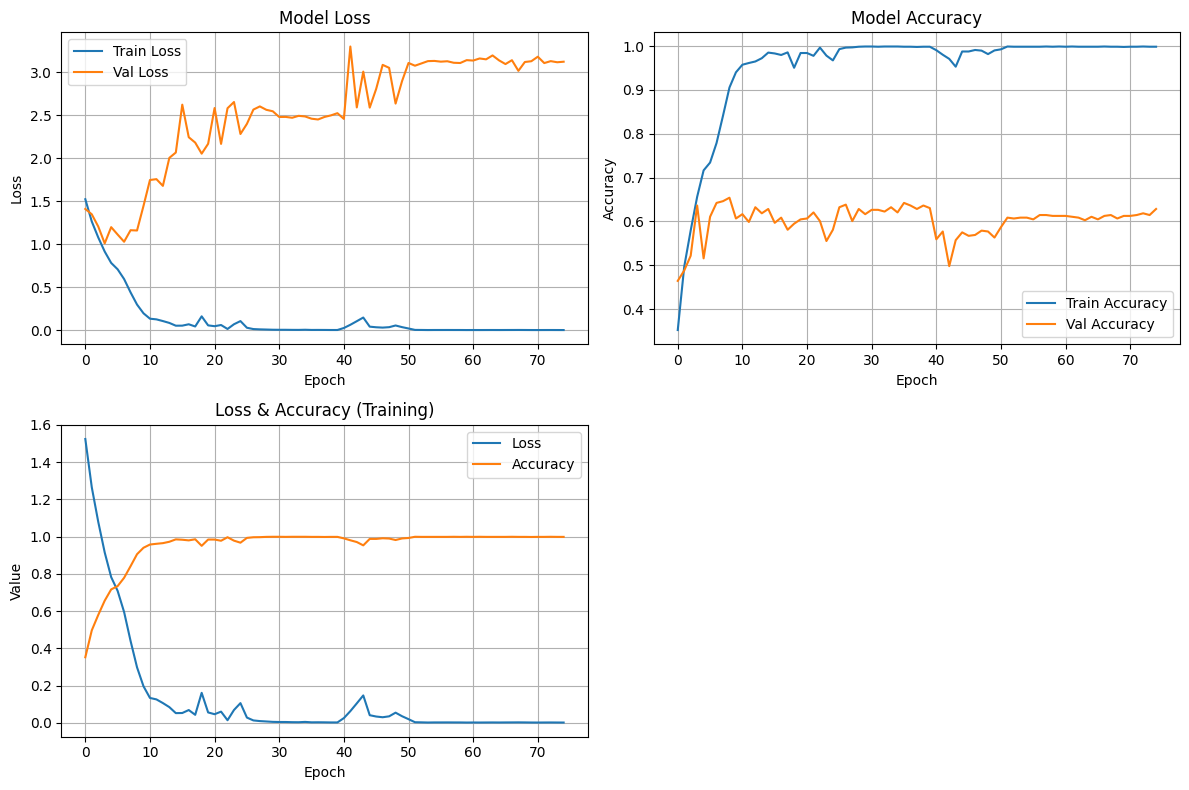

In [6]:
import os
import cv2
import numpy as np
from keras.models import load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Fungsi untuk memuat citra training
def LoadCitraTraining(sDir, LabelKelas):
    JumlahKelas = len(LabelKelas)
    TargetKelas = np.eye(JumlahKelas)
    X = []  # Menampung data citra
    T = []  # Menampung target
    for i in range(JumlahKelas):
        DirKelas = os.path.join(sDir, LabelKelas[i])
        files = os.listdir(DirKelas)
        for f in files:
            ff = f.lower()
            if ff.endswith(('.jpg', '.jpeg', '.png')):
                NmFile = os.path.join(DirKelas, f)
                img = np.double(cv2.imread(NmFile, 1))
                img = cv2.resize(img, (128, 128))
                img = img / 255.0
                img = img.astype('float32')
                X.append(img)
                T.append(TargetKelas[i])
    X = np.array(X, dtype='float32')
    T = np.array(T, dtype='float32')
    return X, T

# Fungsi untuk membangun model CNN
def ModelDeepLearningCNN(JumlahKelas):
    input_img = Input(shape=(128, 128, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(JumlahKelas, activation='softmax')(x)
    ModelCNN = Model(inputs=input_img, outputs=x)
    ModelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ModelCNN

def TrainingCNN(JumlahEpoh, DirektoriDataSet, LabelKelas, NamaFileBobot='Garbage.h5'):
    X, D = LoadCitraTraining(DirektoriDataSet, LabelKelas)

    # Membagi data ke training dan testing
    X_train, X_test, D_train, D_test = train_test_split(X, D, test_size=0.2, random_state=42, shuffle=True)

    # Menampilkan jumlah data
    print(f"Jumlah Data Training: {X_train.shape[0]}")
    print(f"Jumlah Data Testing : {X_test.shape[0]}")

    # Bangun dan latih model CNN
    ModelCNN = ModelDeepLearningCNN(len(LabelKelas))
    history = ModelCNN.fit(X_train, D_train, epochs=JumlahEpoh, shuffle=True, validation_data=(X_test, D_test))
    ModelCNN.save(NamaFileBobot)

    # Evaluasi akurasi data training
    train_loss, train_acc = ModelCNN.evaluate(X_train, D_train)
    print(f"Akurasi Data Training: {train_acc*100:.2f}%")

    # Evaluasi akurasi data testing
    test_loss, test_acc = ModelCNN.evaluate(X_test, D_test)
    print(f"Akurasi Data Testing: {test_acc*100:.2f}%")

    return ModelCNN, history

# Fungsi untuk klasifikasi
def Klasifikasi(DirDataSet, DirKlasifikasi, LabelKelas, ModelCNN=[]):
    if not ModelCNN:
        ModelCNN = load_model('Garbage.h5')
    X = []
    ls = []
    DirKelas = os.path.join(DirDataSet, DirKlasifikasi)
    files = os.listdir(DirKelas)
    for f in files:
        ff = f.lower()
        if ff.endswith(('.jpg', '.jpeg', '.png')):
            ls.append(ff)
            NmFile = os.path.join(DirKelas, f)
            img = cv2.imread(NmFile, 1)
            img = cv2.resize(img, (128, 128))
            img = img / 255.0
            img = img.astype('float32')
            X.append(img)
    X = np.array(X, dtype='float32')
    hs = ModelCNN.predict(X)
    LKlasifikasi = []
    LKelasCitra = []
    for i in range(X.shape[0]):
        v = hs[i, :]
        if v.max() > 0.5:
            idx = np.argmax(v)
            LKelasCitra.append(LabelKelas[idx])
        else:
            idx = -1
            LKelasCitra.append("-")
        LKlasifikasi.append(idx)
    return ls, hs, LKelasCitra

#***********************
# Program Utama
#***********************

# Direktori dataset
DirektoriDataSet = "/content/Garbage classification"

# Label kelas
LabelKelas = ("cardboard","glass","metal","paper","plastic","trash")

# Parameter training
JumlahEpoh = 75
FileBobot = "WRambu.h5"

# Training model
ModelCNN, history = TrainingCNN(JumlahEpoh, DirektoriDataSet, LabelKelas, FileBobot)

# Menampilkan struktur model
ModelCNN.summary()

# Membuat layout 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Grafik 1: Loss
axs[0, 0].plot(history.history['loss'], label='Train Loss')
axs[0, 0].plot(history.history['val_loss'], label='Val Loss')
axs[0, 0].set_title('Model Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Grafik 2: Accuracy
axs[0, 1].plot(history.history['accuracy'], label='Train Accuracy')
axs[0, 1].plot(history.history['val_accuracy'], label='Val Accuracy')
axs[0, 1].set_title('Model Accuracy')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Grafik 3: Gabungan Loss & Accuracy (seperti kode Anda sebelumnya)
axs[1, 0].plot(history.history['loss'], label='Loss')
axs[1, 0].plot(history.history['accuracy'], label='Accuracy')
axs[1, 0].set_title('Loss & Accuracy (Training)')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Value')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Grafik 4: Kosong / bisa diisi tambahan metrik lain
axs[1, 1].axis('off')  # sementara dikosongkan

# Memberi ruang antar grafik agar tidak tumpang tindih
plt.tight_layout()
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/Garbage classification"

# Create an ImageDataGenerator instance
# Define the validation split within the generator
datagen = ImageDataGenerator(validation_split=0.2) # Using 20% of data for validation

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training' # Specify 'training' subset
)

# Load validation data
val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation' # Specify 'validation' subset
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Saving metal3.jpg to metal3.jpg


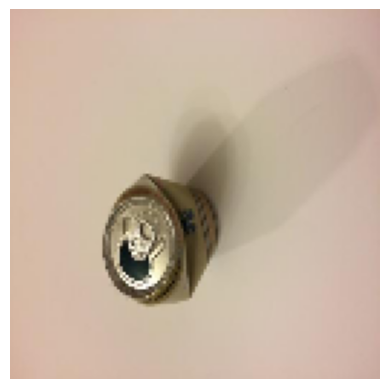

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
metal3.jpg => Pr beneedicted Garbage: metal


In [23]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Label kelas sesuai model yang sudah dilatih
LabelKelas = ["cardboard","glass","metal","paper","plastic","trash"]

uploaded = files.upload()

for fn in uploaded.keys():
  # Load dan tampilkan gambar
  path = fn
  img = image.load_img(path, target_size=(128, 128))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Pra-pemrosesan citra
  x = image.img_to_array(img)
  x = x / 255.0  # normalisasi
  x = np.expand_dims(x, axis=0)

  # Prediksi
  classes = ModelCNN.predict(x)
  pred_idx = np.argmax(classes[0])
  pred_label = LabelKelas[pred_idx]

  print(f'{fn} => Pr beneedicted Garbage: {pred_label}')

In [8]:
!pip install anvil-uplink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.5 MB/s eta 0:00:00


In [9]:
import anvil.server

In [10]:
anvil.server.connect("server_62RJ6QW3Z5GZSXNYONAABASU-APNGV5L6O45NJWZ2")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Klasifikasi Jenis Sampah " as SERVER


In [11]:
import anvil.server
import anvil.media
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

ModelCNN = load_model('WRambu.h5')

# Label kelas sesuai urutan output model
LabelKelas = ["cardboard","glass","metal","paper","plastic"]

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as f:
        img = load_img(f, target_size=(128, 128))  # Sesuaikan jika model pakai ukuran lain
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        prediction = ModelCNN.predict(img_array)
        pred_index = np.argmax(prediction[0])
        pred_label = LabelKelas[pred_index]

        return pred_label

In [ ]:
anvil.server.wait_forever()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
